<h1 style="font-family:Impact,Arial;font-size:70px;">Pandas &#8212; Part IV:<br> Movie ratings</h1>
<h2 style="font-familﬁy:Arial;">Matias Quiroz (original: Adel Rahmani)</h2>
<p><small> School of Mathematical &amp; Physical Sciences<br>
University of Technology Sydney
</small></p>
<p>
<a href="mailto:matias.quiroz@uts.edu.au" target="_blank">
<small><font color=MediumVioletRed>matias.quiroz@uts.edu.au</font></small></a>
</p>
<hr style="height:5px;border:none;color:#333;background-color:#333;" />

<div style="background-color:#F2FBEF;">
<h2><font color=#04B404>After completing this notebook you should:</font></h2>
<ul>
<li> Know how to wrangle data using <code>pandas</code>.</li><br>
</ul>
</div>

<div style="background-color:#ADD8E6;">
<h2><font color=#00008B>Suggested way of working with the lecture notebooks:</font></h2>
<br>

<ul>
<li> Open a new empty notebook document through `File->New Notebook->Python 3 (ipykernel)` (or similar depending on version).</li><br>
<li> Keep two documents open. This notebook (or its HTML version) and the notebook you created above. </li><br>
<li> Type your solutions/code in the notebook you created. Avoid copy-pasting as much as possible: You need to develop the "muscle memory" that comes with writing code.</li><br>
</ul>
</div>

<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Note:</font> </h3>
We refer to <em>Wes McKinney</em>'s book <b>Python for Data Analysis, 2nd edition</b> as <b>PDA</b>.<br>

(The page numbers refer to the PDF version of the ebook.)

<a href="http://pandas.pydata.org/"><img src="https://covers.oreillystatic.com/images/0636920050896/lrg.jpg" width="150" /></a> <br>

The datasets used in the book are available from https://github.com/pydata/pydata-book.<br>

<p>If you want to download the entire repository to your computer you can use <code>git</code> to do it.<br> 

In the <code>Terminal</code> (or the command line console in Windows), go to the directory where you want to download the repository and enter:</p>
<pre><code>git clone https://github.com/pydata/pydata-book.git</code></pre>
<br>
</div>

In [1]:
from math import *
import numpy as np
import pandas as pd
from pathlib import Path

import seaborn as sns
sns.set_style('white')

# colormap definitions
from matplotlib import cm 

%matplotlib inline
import matplotlib.pyplot as plt

# suppress annoying warning messages.
import warnings
warnings.filterwarnings('ignore')

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1> 1. MovieLens Dataset (see PDA).</h1>


<h3> <center><font color=MediumVioletRed>A. The dataset</font></center></h3>


<p>The MovieLens 1M dataset contains 1 million ratings from 6000 users on 4000 movies. We will mostly follow the
code from the <b>PDA</b> book, but we will digress here and there as we try to answer different questions about the data. </p>

<p>Go to the <a href="http://grouplens.org/datasets/movielens/">MovieLens</a> website and download the <b>MovieLens 1M</b> dataset.</p>

From the website:
<blockquote>GroupLens Research has collected and made available rating data sets from the MovieLens web site (http://movielens.org). The data sets were collected over various periods of time, depending on the size of the set. Before using these data sets, please review their README files for the usage licenses and other details.
</blockquote>


<p>Download the zip file and unzip it in the datasets directory. It should create a directory called <code>ml-1m</code>.</p>

<p>Within that directory, you should see .dat files. Let us have a peek at what is in them using the UNIX <code>head</code> command.</p>

In [2]:
# datasets directory in the same folder.
dataset_dir = Path('datasets/ml-1m')

In [4]:
# On Windows use: !more {dataset_dir/'movies.dat'}
# On UNIX like systems (for example Mac) use: !head {dataset_dir/'movies.dat'}
!more {dataset_dir/'movies.dat'}

1::Toy Story (1995)::Animation|Children's|Comedy
2::Jumanji (1995)::Adventure|Children's|Fantasy
3::Grumpier Old Men (1995)::Comedy|Romance
4::Waiting to Exhale (1995)::Comedy|Drama
5::Father of the Bride Part II (1995)::Comedy
6::Heat (1995)::Action|Crime|Thriller
7::Sabrina (1995)::Comedy|Romance
8::Tom and Huck (1995)::Adventure|Children's
9::Sudden Death (1995)::Action
10::GoldenEye (1995)::Action|Adventure|Thriller
11::American President, The (1995)::Comedy|Drama|Romance
12::Dracula: Dead and Loving It (1995)::Comedy|Horror
13::Balto (1995)::Animation|Children's
14::Nixon (1995)::Drama
15::Cutthroat Island (1995)::Action|Adventure|Romance
16::Casino (1995)::Drama|Thriller
17::Sense and Sensibility (1995)::Drama|Romance
18::Four Rooms (1995)::Thriller
19::Ace Ventura: When Nature Calls (1995)::Comedy
20::Money Train (1995)::Action
21::Get Shorty (1995)::Action|Comedy|Drama
22::Copycat (1995)::Crime|Drama|Thriller
23::Assassins (1995)::Thriller
24::Powder (1995)::Drama|Sci-Fi
25::Le

In [5]:
# On Windows use !more {dataset_dir/'users.dat'}
# On UNIX like systems (for example Mac) use !head {dataset_dir/'users.dat'}
!more {dataset_dir/'users.dat'}

1::F::1::10::48067
2::M::56::16::70072
3::M::25::15::55117
4::M::45::7::02460
5::M::25::20::55455
6::F::50::9::55117
7::M::35::1::06810
8::M::25::12::11413
9::M::25::17::61614
10::F::35::1::95370
11::F::25::1::04093
12::M::25::12::32793
13::M::45::1::93304
14::M::35::0::60126
15::M::25::7::22903
16::F::35::0::20670
17::M::50::1::95350
18::F::18::3::95825
19::M::1::10::48073
20::M::25::14::55113
21::M::18::16::99353
22::M::18::15::53706
23::M::35::0::90049
24::F::25::7::10023
25::M::18::4::01609
26::M::25::7::23112
27::M::25::11::19130
28::F::25::1::14607
29::M::35::7::33407
30::F::35::7::19143
31::M::56::7::06840
32::F::25::0::19355
33::M::45::3::55421
34::F::18::0::02135
35::M::45::1::02482
36::M::25::3::94123
37::F::25::9::66212
38::F::18::4::02215
39::M::18::4::61820
40::M::45::0::10543
41::F::18::4::15116
42::M::25::8::24502
43::M::25::12::60614
44::M::45::17::98052
45::F::45::16::94110
46::M::18::19::75602
47::M::18::4::94305
48::M::25::4::92107
49::M::18::12::77084
50::F::25::2::

In [6]:
# The ratings file is about 1 million rows, so we will cannot use !more because the kernel will freeze.
# Print first 50 obs
file_path = 'datasets/ml-1m/ratings.dat'

with open(file_path, 'r') as file:
    for _ in range(50):
        line = file.readline()
        print(line, end='')

# Close the file
file.close()

1::1193::5::978300760
1::661::3::978302109
1::914::3::978301968
1::3408::4::978300275
1::2355::5::978824291
1::1197::3::978302268
1::1287::5::978302039
1::2804::5::978300719
1::594::4::978302268
1::919::4::978301368
1::595::5::978824268
1::938::4::978301752
1::2398::4::978302281
1::2918::4::978302124
1::1035::5::978301753
1::2791::4::978302188
1::2687::3::978824268
1::2018::4::978301777
1::3105::5::978301713
1::2797::4::978302039
1::2321::3::978302205
1::720::3::978300760
1::1270::5::978300055
1::527::5::978824195
1::2340::3::978300103
1::48::5::978824351
1::1097::4::978301953
1::1721::4::978300055
1::1545::4::978824139
1::745::3::978824268
1::2294::4::978824291
1::3186::4::978300019
1::1566::4::978824330
1::588::4::978824268
1::1907::4::978824330
1::783::4::978824291
1::1836::5::978300172
1::1022::5::978300055
1::2762::4::978302091
1::150::5::978301777
1::1::5::978824268
1::1961::5::978301590
1::1962::4::978301753
1::2692::4::978301570
1::260::4::978300760
1::1028::5::978301777
1::102

Looking at the README file we see that 
<blockquote>
<p>All ratings are contained in the file "ratings.dat" and are in the
following format:

<code>UserID::MovieID::Rating::Timestamp</code>
</p>

<p>User information is in the file "users.dat" and is in the following
format:

<code>UserID::Gender::Age::Occupation::Zip-code</code>
</p>

<p>Movie information is in the file "movies.dat" and is in the following
format:

<code>MovieID::Title::Genres</code></p>
</blockquote>


Since the data files do not include the names of the columns, we will pass them to <code>read_csv</code>.

<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Remark:</font> </h3>
<p>This dataset has movies mainly from the US and western Europe, and is relatively old, therefore the text was encoded using <b>latin-1</b> encoding instead of <b>utf-8</b>. We can pass that information to pandas to ensure that the text is loaded correctly.</p>
</div>

In [3]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip'] 
input_file = dataset_dir/'users.dat'
users = pd.read_csv(input_file, sep='::', header=None, names=unames, encoding='latin-1')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
input_file = dataset_dir/'ratings.dat'
ratings = pd.read_csv(input_file, sep='::', header=None, names=rnames, encoding='latin-1')

mnames = ['movie_id', 'title', 'genres']
input_file = dataset_dir/'movies.dat'
movies = pd.read_csv(input_file, sep='::', header=None, names=mnames, encoding='latin-1')

In [4]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Note:</font> </h3>
<p>We could convert the timestamp column in <code>ratings</code> to a datetime object as shown below, but we will not be using that feature in this notebook.</p>
</div>

In [7]:
from datetime import datetime
ratings.timestamp.map(datetime.utcfromtimestamp).head()

0   2000-12-31 22:12:40
1   2000-12-31 22:35:09
2   2000-12-31 22:32:48
3   2000-12-31 22:04:35
4   2001-01-06 23:38:11
Name: timestamp, dtype: datetime64[ns]

<div style="background-color:#F7F2E0;">
<h2> <font color=MediumVioletRed>Practice makes perfect (needs to be solved for the rest of the notebook to work).</font></h2>

<p>At the moment our data is spread across 3 dataframes. It would be more convenient to merge all the data into a single dataframe.</p>
<p>Merge the 3 dataframes into a single one called <code>data</code>. </p>
<p>Think carefully about which part of the data is in each of the dataframes above.</p> 
</div>


In [8]:
# write your answer in this cell

<hr/>
<h3> <center><font color=MediumVioletRed>B. First look at the data</font></center></h3>

Let us double check how many reviews we have.

In [9]:
data.count()

NameError: name 'data' is not defined

Let us also check the data types of our features

In [10]:
data.dtypes

NameError: name 'data' is not defined

In [14]:
data['gender'] = data.gender.astype('category')
data['title']  = data.title.astype('string')
data['genres']  = data.genres.astype('string')

NameError: name 'data' is not defined

In [15]:
data[['rating', 'age']].describe().round(1)

NameError: name 'data' is not defined

It turns out we have slightly more than 1 million rows in our table. 

Note: Age 1 represents individuals under the age of 18, and not 1 year olds. This information is available in the README.txt. It is always important to read the supporting information that is provided for the dataset, before analysing the data.

Let us answer some basic questions.


<b>How many unique (different) movies do we have?</b>


In [16]:
display(data.title.head())
display(data.title.unique())
print(data.title.nunique())

NameError: name 'data' is not defined

<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Remark:</font> </h3>
<p>This dataset has been carefully constructed so we can be reasonably confident that the data is consistent.
However, it is a good habit to double-check by running some simple tests. For instance, each movie should have a
unique id, therefore, there should be the same number of movie ids as there are movie titles.</p>
</div>

In [17]:
print(data.movie_id.nunique())

NameError: name 'data' is not defined

#### How many movie genres are there?

In [18]:
data.genres.nunique()

NameError: name 'data' is not defined

#### This seems like a lot!
Let us look at how the genres are identified.

In [19]:
data.genres.unique()[:20]

NameError: name 'data' is not defined

This makes sense, the genre labels are actually <b>composite labels</b> made of <b>several categories</b>. 
Let us find out how many categories there are. 

In [20]:
cat = [item.split('|') for item in data.genres.unique()]

NameError: name 'data' is not defined

In [21]:
cat[:10]

NameError: name 'cat' is not defined


We need to flatten this nested list. 

Because the nesting is only one level deep (we have a list of lists, but not a list of lists of lists...), the <a href="http://pymotw.com/3/itertools/"><code>itertools</code></a> module has just the right function. 

In [22]:
from itertools import chain

list(chain.from_iterable(['a', 'b', ['c', 'd']]))

['a', 'b', 'c', 'd']

<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Remark:</font> </h3>
<p>There is actually a way to flatten a list of lists without using <code>chain</code>, however, the syntax is a bit more unwieldy and I find it less clear than the previous code. Here is what it looks like for reference.</p>
</div>

In [23]:
[item for item2 in ['a', 'b', ['c', 'd']] for item in item2]

['a', 'b', 'c', 'd']

Let us get back to our data and flatten the nested sequence of genre categories.

In [24]:
cat2 = list(chain.from_iterable(cat))
cat2[:10]

NameError: name 'cat' is not defined

To obtain unique categories, we can create a `set` object.

In [25]:
categories = set(cat2)
categories, len(categories)

NameError: name 'cat2' is not defined

That makes more sense. The 301 genres are constructed by combining subsets these 18 categories.
<h3>Which movies are associated with a single category?</h3>

In order to answer this question we need to expand the current genres into the invidual categories.
The <code>split</code> method of pandas can help us with this.

Let us see how that works on a small sample from our data.

In [26]:
(data
 .sample(10, random_state=42)
 .set_index('title')
 .genres
 .str.split('|')
) 

NameError: name 'data' is not defined

At the moment each value is a list. We can count the number of categories for each movie simply by computing the length of each list.

In [27]:
(data
 .sample(10, random_state=42)
 .set_index('title')
 .genres
 .str.split('|')
 .str.len()
) 

NameError: name 'data' is not defined

An alternative, which is more involved but has the merit of demonstrating how mutiple pandas concepts can be combined to provide the answer, can be constructed by expanding those list values...

In [28]:
(data
 .sample(10, random_state=42)
 .set_index('title')
 .genres
 .str
 .split('|', expand=True)
) 

NameError: name 'data' is not defined

... and then counting how many non null values we have in each row.

In [29]:
(data
 .sample(10, random_state=42)
 .set_index('title')
 .genres
 .str
 .split('|', expand=True)
 .notnull()
 .sum(axis=1)
) 

NameError: name 'data' is not defined

And voilà! Using the same approach on the whole data set we can create a mask to select only the movies which belong to a single category.

Let us see how fast the two approaches are when applied to the whole data set.

In [30]:
%%time
unique_cat_mask = (data
 .set_index('title')                   
 .genres
 .str
 .split('|')
 .str
 .len()
) == 1

NameError: name 'data' is not defined

In [31]:
%%time 
unique_cat_mask2 = (data
 .set_index('title')                   
 .genres
 .str
 .split('|', expand=True)
 .notnull()
 .sum(axis=1)
) == 1

NameError: name 'data' is not defined

In [32]:
display(unique_cat_mask.head())
np.all(unique_cat_mask == unique_cat_mask2) # Confirming the both approaches produce the same result.

NameError: name 'unique_cat_mask' is not defined

Since the data contains multiple reviews for each movie we will need to drop the duplicate entries at the end.

In [33]:
(data
 .loc[unique_cat_mask.values][['title', 'genres']]
 .drop_duplicates(subset='title')
 .set_index('title')
)

NameError: name 'data' is not defined

<div style="background-color:#F7F2E0;">
<h2> <font color=MediumVioletRed>Practice makes perfect (needs to be solved for the rest of the notebook to work).</font></h2>

<p>Compute how many movies are associated with each of the 18 categories (which, for simplicity we still refer to as the <em>genre</em> of the movie).</p> 
<p>Store the result into the variable <code>genre_count</code>.</p>
<p><b>Note:</b><br>
Think carefully about the problem. The number of <em>movies</em> associated with a particular genre is not the same as the number of <em>reviews</em> associated with the same genre...</p>
</div>


In [34]:
# Write your answer here

#### Let us visualise this quickly

In [35]:
# dictionary of parameters for matplotlib plots
params = {'axes.titlesize' : 18,
          'xtick.labelsize': 16, 
          'ytick.labelsize': 16,
          'font.family' : "DejaVu Sans"} # You can try other fonts, such as Calibri, if available on your system.

# Set the parameter using 'with'. 
# This syntax ensures that the settings defined above are only affecting this plot

with plt.rc_context(rc=params):
    fig = plt.figure(figsize=(14,7))
    ax = genre_count.plot.barh(width=0.8, color='g', alpha=0.5, align='center')
    ax.set_title("Number of movies per genre")
    ax.xaxis.grid(True)
    plt.show()

NameError: name 'genre_count' is not defined

<Figure size 1400x700 with 0 Axes>

<br>
<div style="background-color:#FBEFFB;"><p style="font-size:20px;color:#FF0080">&#9888; Stop and think!</p> <!--- Warning --->
<p>Make sure you understand how the previous code works.</p>
</div>

Looks like there are lots of comedies and dramas movies and fewer documentaries or westerns... 

<hr/>
<h3> <center><font color=MediumVioletRed>C. Genres &amp; Gender</font></center></h3>


<h4>What is the proportion of male reviewers?</h4>
There are a couple of ways to answer this.

In [36]:
data.gender.value_counts()

NameError: name 'data' is not defined

In [37]:
data.gender.describe()

NameError: name 'data' is not defined

This tells us that 753769 out of 1000209 reviewers are male. That's about 75%.

Here's another way to get this result. 




In [38]:
data.gender.value_counts(normalize = True).round(2)*100

NameError: name 'data' is not defined

#### What are the distributions of ratings for male and female reviewers?

In [39]:
ax = (data
      .groupby('gender')['rating']
      .value_counts(normalize=True)
      .sort_index()
      .unstack(0)
      .plot
      .bar(rot=0, 
           grid=True,
           ec='k',
           width=0.8,
           alpha=0.6 
          )
     )

ax.set_xlabel('Rating', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12);

NameError: name 'data' is not defined

Alternative, more verbose (more matplotlib, less pandas) version:

In [40]:
male_rating   = data[data.gender == 'M']['rating'].values
female_rating = data[data.gender == 'F']['rating'].values

plt.hist((female_rating, male_rating),  
         bins = range(1, 7), 
         label=('M','F'), 
         align='left',
         ec='k',
         density=True, 
         alpha=0.6)

plt.grid(axis='y')
plt.xlabel('rating')
plt.ylabel('frequency')
plt.xticks(np.arange(1, 6))
plt.legend()
plt.show()

NameError: name 'data' is not defined

<p>Looks like male and female reviewers are about the same when it comes to the overall ratings. I wonder if the same holds for
a specific category?</p><br>

<div style="background-color:#FBEFFB;">
<p style="font-size:20px;color:#FF0080">&#9888; Stop and Think!</p> <!--- Warning --->
<p>Before going any further, notice that we have normalised the histogram which can be misleading when it comes to assessing the <em>number</em> of reviews for each gender. In fact, there are far fewer female reviewers in the dataset.</p>
</div>


In [41]:
ax = (data
      .groupby('gender')['rating']
      .value_counts()  # no longer normalised
      .sort_index()
      .unstack(0)
      .plot
      .bar(rot=0, 
           grid=True,
           ec='k',
           width=0.8,
           alpha=0.6 
          )
     )

ax.set_xlabel('Rating', fontsize=12)
ax.set_ylabel('Count', fontsize=12);

NameError: name 'data' is not defined

Let us keep this in mind as we proceed.

Let us look at 'Action'. The code is similar to what we did above but we first need to find all the movies which contain 'Action' in their genre. 

In [42]:
ax = (data
      .loc[data.genres.str.contains('Action')]
      .groupby('gender')['rating']
      .value_counts(normalize=True)
      .sort_index()
      .unstack(0)
      .plot
      .bar(rot=0, 
           grid=True,
           ec='k',
           width=0.8,
           alpha=0.6 
          )
     )

ax.set_title('Action', fontsize=14)
ax.set_xlabel('Rating', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12);

NameError: name 'data' is not defined

Let us do the same for Romance.

In [43]:
ax = (data
      .loc[data.genres.str.contains('Romance')]
      .groupby('gender')['rating']
      .value_counts(normalize=True)
      .sort_index()
      .unstack(0)
      .plot
      .bar(rot=0, 
           grid=True,
           ec='k',
           width=0.8,
           alpha=0.6 
          )
     )

ax.set_title('Romance', fontsize=14)
ax.set_xlabel('Rating', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12);

NameError: name 'data' is not defined

<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Remark:</font> </h3>
<p>This is nice, however, it is silly to retype the same code every time we want to look at a different category.</p>

<p>Because we have a reasonable number of categories (18), why not plot the histograms for all of them at once?</p>
<p>As we see in the next cell, owing to the powerful object-oriented syntax of matplotlib, it does not take much more code
to plot all the histograms.</p>

<p>Note that these <b>are not disjoint subsets</b> of the data since a movie genre generally includes more
than one category.</p> 

<p>For instance, a movie can be labeled as both Action and Adventure.<p>

</div>

Let us first create a function that will plot the ratings for just a single genre.

In [44]:
def plot_rating_for_genre(cat='Action', ax=None, normalize=False):
    (data
      .loc[data.genres.str.contains(cat)]
      .groupby('gender')['rating']
      .value_counts(normalize=normalize)
      .sort_index()
      .unstack(0)
      .plot
      .bar(ax=ax,
           rot=0, 
           grid=False,
           ec='k',
           width=0.8,
           alpha=0.6,
          )
     )
    
    ax.set_title(cat, fontsize=14)
    ax.set_xlabel('Rating', fontsize=12)
    ax.set_ylabel('Frequency' if normalize else 'Count', fontsize=12)

Let us look at each category separately using maptlotlib's powerful object-oriented syntax __(Caution: this may take a while depending on your machine)__.

NameError: name 'categories' is not defined

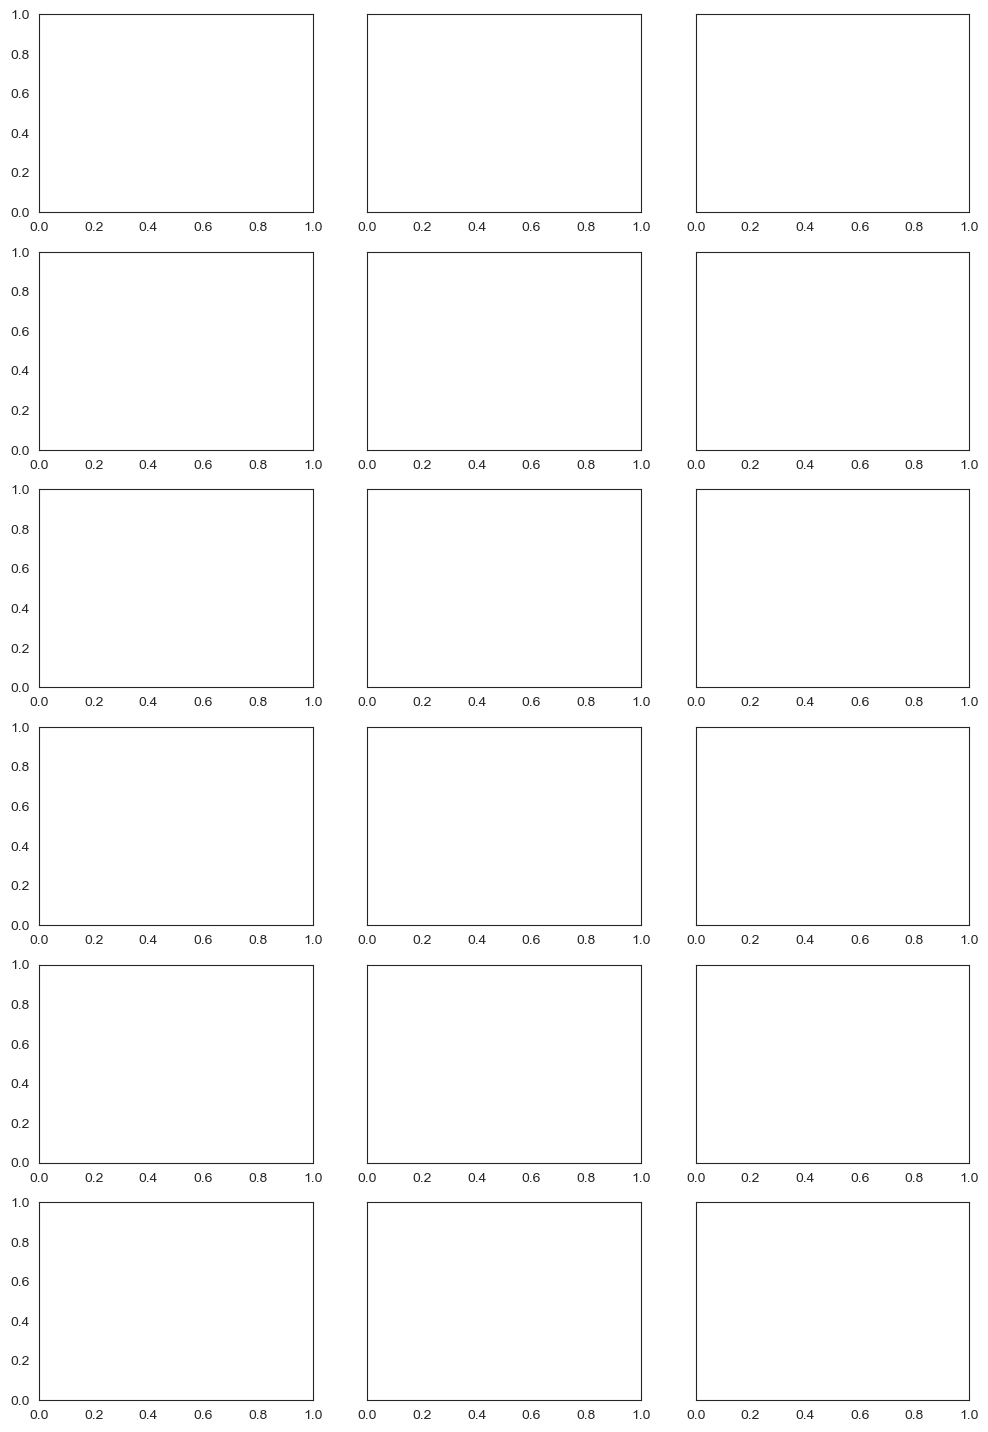

In [45]:
fig, axes = plt.subplots(6, 3, figsize=(12, 18), sharey=True)

for (cat, ax) in zip(categories, axes.flatten()):
    
    plot_rating_for_genre(cat, ax=ax, normalize=True)
    
fig.tight_layout()
plt.show()

<div style="background-color:#FBEFFB;">
<p style="font-size:20px;color:#FF0080">&#9888; Stop and Think!</p> <!--- Warning --->
<p>Do you understand every expression in the code above?</p>
</div>

<div style="background-color:#F7F2E0;">
<h2> <font color=MediumVioletRed>Practice makes perfect.</font></h2>

<p>Did you expect a more striking difference between male and female reviewers for some categories? </p>

<p>Before you answer, think about the data. The categories are mixed up in the genres label. In order to
get a better idea of the rating distribution by gender we would need to select movies which genre label
corresponds to a <b>single</b> category.</p>

<p>How many movies are labelled by a single genre category?</p>
<p>For any given category, what percentage of movies belong to this category exclusively?</p>

<p><b>Write a function to answer these questions in the cell below.</b></p>
</div>


In [ ]:
categories

In [ ]:
# Write your answer here

Note that only 1 movies has the single label Fantasy. I am curious, what is the movie?

In [ ]:
data[data.genres == 'Fantasy'].title.values[0]

<div style="background-color:#F7F2E0;">
<h1> <font color=MediumVioletRed>Practice makes perfect (needs to be solved for the rest of the notebook to work).</font></h1>

<p>Modify the code we wrote earlier to plot the histograms for the 18 genre category <b>but only for those movies that are labeled by
a <u>single</u> category</b>.</p>

<p><b>Since there is only 1 review for the only movie whose genre is "Fantasy" you will need to treat this case separately in the loop.</b></p>

<p>Is it better to use normalised or non-normalised histograms? What do you think?</p>

<p>Do you see anything interesting in the plots? How would you go about quantifying the differences in ratings between male and female reviewers?</p>

</div>


In [46]:
# Write your answer here

#### There is some difference between the number of male and female reviewers.

Let us try to see how the genders are split across the movies which belong to a unique genre category. 

Note that we could simply add the number of reviews across all ratings in the bar plots above, however, let us redo the computation from scratch.

Let us create a new boolean feature in the data to tell us if the movie belongs to a single category.

As we saw above, we can detect if a movie has a composite genre using the `split` function.

In [47]:
data['unique_genre'] = data.genres.str.split('|').str.len() == 1

NameError: name 'data' is not defined

In [48]:
data.sample(n=10, random_state=0)

NameError: name 'data' is not defined

<div style="background-color:#FBEFFB;">
<p style="font-size:20px;color:#FF0080">&#9888; Stop and Think!</p> <!--- Warning --->
<p>There may be different ways of accomplishing the same task, however, as your dataset becomes larger, you should start thinking about efficiency and speed.</p>
<p>As a general rule, it is better to perform an operation on the whole dataframe directly rather than via the <code>apply</code> method.
</div>

We can now use `groupby` to get the information we are after, in the form of a Pandas Series.

In [49]:
s = data[data.unique_genre].groupby('genres')['gender'].value_counts()
s

NameError: name 'data' is not defined

In [50]:
subset = s.unstack().fillna(0).astype(int)
subset

NameError: name 's' is not defined

In [51]:
subset.plot(kind='barh', figsize=(14, 7), stacked=True, width=0.8, ec='k', alpha=0.6);

NameError: name 'subset' is not defined

#### Drama and Comedy are dwarfing the other categories. Let's normalise the plots for each category separately.

In [52]:
normalised_subset = subset.div(subset.sum(axis=1), axis=0)
normalised_subset

NameError: name 'subset' is not defined

<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Remark:</font> </h3>
<p>There is a more straightforward way of doing the same thing using <code>value_counts(normalize=True)</code>.</p>
</div>

In [53]:
normalised_subset = (data[data.unique_genre]
                     .groupby('genres')['gender']
                     .value_counts(normalize=True)
                     .unstack()
                     .fillna(0)
                    )
normalised_subset

NameError: name 'data' is not defined

In [54]:
ax = normalised_subset.plot(kind='barh', 
                       figsize=(12, 7), 
                       stacked=True, 
                       fontsize=14,
                       width=0.8, 
                       ec='k',
                       alpha=0.6)
ax.set_xlabel("Proportions", fontsize=20)
ax.set_ylabel("Genre", fontsize=20)
# 1% margins around the bar chart
plt.margins(0.01)
# move the legend off the plot
plt.legend(bbox_to_anchor = [1., 0.9])
plt.tight_layout()

NameError: name 'normalised_subset' is not defined

This plot provides a nice visual summary of the gender distribution across movie categories. 

Perhaps unsurprisingly, `Romance`, `Musical` and `Children's` are the three categories where the number of female reviewers is almost on par with the number of male rewiewers...

<div style="background-color:#FBEFFB;">
<p style="font-size:20px;color:#FF0080">&#9888; Beware!</p> <!--- Warning --->
<ul>
<li>The analysis above was really a pretext for illustrating Pandas and Matplotlib techniques.</li><br>
<li>In the "real world" you wouldn't want to do what we just did because some of the categories only have a handful of
movies (sometimes a single one!).</li><br>
<li>Therefore, in some cases we are throwing away most of
the data. A better approach would be to look at groupings of categories (eg, <code>Romance|Comedy</code> or <code>Mystery|Crime|Thriller</code>), and
check that there are enough reviews in those new categories for both genders. </li>
</ul>
</div>


<h3> <center><font color=MediumVioletRed>D. A deeper look</font></center></h3>

Let us get back to the <b>PDA</b> book... 

We will also explore the data independently from the book as we see fit.

That is what <b>exploratory data analysis</b> should be. The code should reflect your <b>curiosity</b> about the data.

In [55]:
# This is where the PDA material picks up
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings.head()

NameError: name 'data' is not defined

#### Notice that we have some missing values

In [56]:
mean_ratings.count()

NameError: name 'mean_ratings' is not defined

Percentage of NaN values for female and male reviewers.

In [57]:
mean_ratings.F.isnull().mean()* 100, mean_ratings.M.isnull().mean() * 100 

NameError: name 'mean_ratings' is not defined

This means that about 6% of movies do not have any female reviewer, while less than 1% of movies
have not been reviewed by any male reviewer.

In [58]:
# Do you understand what this does?
mask = mean_ratings['F'].isnull() | mean_ratings['M'].isnull()

NameError: name 'mean_ratings' is not defined

In [59]:
mean_ratings[mask]

NameError: name 'mean_ratings' is not defined

<h3> <center><font color=MediumVioletRed>E. Ladies and Gentlemen</font></center></h3>
<p>Let us have a look at which movies were most polarising among male and female reviewers.</p>

<p>Ratings for movies reviewed by only a handful of people are probably not representative, so let us have a cutoff
for the minimum number of reviews of a given gender. </p>

<p>Let us also decide on how many movies we want in the result (eg, top 10 movies preferred by male reviewers).</p>

<p>Finally, let us quickly visualise the results. The function below takes care of all this.</p>

In [60]:
data.gender = data.gender.astype(object)   # needed because of a bug with categorical variables.

def extreme_ratings_diff(data, cutoff=1000, top=10):
    '''
    This function extract which movies had the largest difference (in absolute value) in average rating 
    between male and female reviewers.    
    '''
    
    group_by_movie_gender = data.groupby(['title', 'gender'])['rating'].mean().unstack().dropna()
    group_by_movie_gender = group_by_movie_gender[data.groupby('title').size() > cutoff]
    
    if group_by_movie_gender.empty:
        print("No results found. Try reducing the cutoff")
        return None, None
    
    group_by_movie_gender['diff'] = group_by_movie_gender.F - group_by_movie_gender.M
    
    ladies_vs_gents = group_by_movie_gender.sort_values('diff', ascending = False)
    
    dataF = ladies_vs_gents.iloc[:top]
    dataM = ladies_vs_gents.iloc[-top:][::-1]
    
    dataM.diff = np.abs(dataM['diff'])
    
    styles = {
                'xtick.labelsize': 14,
                'ytick.labelsize': 14,
                'legend.fontsize': 14,
                'axes.titlesize': 18
             }
    
    with plt.style.context(styles):  # Sets a style context for matplotlib 
    
        fig, ax = plt.subplots(1, 2, figsize=(14, top))

        dataF.sort_values('diff', ascending=True)[['F','M','diff']].plot(kind='barh', 
                                                                  ax=ax[0],
                                                                  ec='k',
                                                                  alpha=0.9,
                                                                  legend=False)
        ax[0].set_title('Females prefer')
        ax[0].set_ylabel('')
        ax[0].set_xticks(range(6))

        dataM.sort_values('diff', ascending=False)[['F','M','diff']].plot(kind='barh', 
                                                                  ax=ax[1],
                                                                  ec='k',                                                                                                               alpha=0.9,
                                                                  legend=False)
        ax[1].set_title('Males prefer')
        ax[1].set_ylabel('')
        ax[0].set_xticks(range(6))


        handles, labels = ax[0].get_legend_handles_labels()
        plt.tight_layout()
        fig.legend(handles, labels, bbox_to_anchor=(1.1, 0.5))
        plt.show()
    return dataF, dataM


NameError: name 'data' is not defined

In [61]:
dataF, dataM = extreme_ratings_diff(data)

NameError: name 'extreme_ratings_diff' is not defined

In [62]:
dataF, dataM = extreme_ratings_diff(data, cutoff=500, top=10)

NameError: name 'extreme_ratings_diff' is not defined

<div style="background-color:#F7F2E0;">
<h1> <font color=MediumVioletRed>Practice makes perfect.</font></h1>

<p>Let us now look at which movies have been ranked in the top N best or worst movies by <b>both</b> male and female reviewers.<p>
<p>Create a function <code>ratings_topN</code> to compute and visualise the results.</p>
<br>
</div>

<div style="background-color:#FBEFFB;">
<p style="font-size:20px;color:#FF0080">&#9888; Stop and Think!</p> <!--- Warning --->
<p>Make sure you read the previous paragraph carefully. We are not looking for the top N (or bottom N) movies when
male and female reviewers are aggregated... It is a bit more subtle than that.</p>
</div>

<div style="background-color:#F7F2E0;">
<h1> <font color=MediumVioletRed>Practice makes perfect.</font></h1>

<p>There is a smaller, but more recent dataset with 100,000 reviews at <a href="https://grouplens.org/datasets/movielens/">MovieLens</a>, download the dataset, unzip it and load and merge the movies and ratings csv files into a dataframe called <code>small_data</code></p>

<p>Answer the following questions:</p>
<ol>
    <li>What are the top 20 movies in terms of number of ratings?</li><br>    
    <li>What are the bottom 20 movies in terms of number of ratings?</li><br>    
    <li>Which user has reviewed the largest number of movies?</li><br>    
    <li>What is this user's average rating across all the movies he or she has reviewed?</li>    
</ol>    

<br>
</div>

<br>
<br>
<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1> Practice, Practice, Practice</h1>
<ol>


<li> Go through the notebook again and make sure you understand everything. </li><br>
    
<li> If you have not done so yet, solve the tutorial problems corresponding to Notebook 7. Nothing new was really introduced this week, we are just applying what we learned in Notebook 7 to a more complex dataset.</li><br>

<li> You now should have a pretty good grasp of the basics of <code>pandas</code>.
To take your skills to the next level, have a look at Tom Augspurger's <a href="https://tomaugspurger.github.io/modern-1-intro">modern pandas tutorials</a>.</li><br>

</ol>


> Material by Adel Rahmani